In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))


<IPython.core.display.Javascript object>

In [2]:
# Read the input training and test data
input_data_file = "bangalore-cas-alerts.csv"
train_data = pd.read_csv(input_data_file)
train_data.head(10)

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
5,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
6,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
7,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
8,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z
9,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z


In [3]:
# Forward Collision Warning (FCW)

# Headway/Following Time Monitoring & Warning (HMW)

# Lane Departure Warning Left (LDWL)

# Lane Departure Warning Right (LDWR)

# Speed Limit Indicator (Overspeed)

# Pedestrian & Cyclist Collision Warning (PCW)

# Urban Forward Collision Warning (FCW)

In [4]:
# Remove duplicates and check dataset size
train_data.drop_duplicates(inplace=True)
train_data.shape

(152276, 7)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152276 entries, 0 to 207616
Data columns (total 7 columns):
deviceCode_deviceCode                 152276 non-null int64
deviceCode_location_latitude          152276 non-null float64
deviceCode_location_longitude         152276 non-null float64
deviceCode_location_wardName          152276 non-null object
deviceCode_pyld_alarmType             152276 non-null object
deviceCode_pyld_speed                 152276 non-null int64
deviceCode_time_recordedTime_$date    152276 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 9.3+ MB


In [6]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceCode_deviceCode,152276.0,8.641311e+14,2.963658e+11,8.620100e+14,8.639770e+14,8.639770e+14,8.645040e+14,8.645040e+14
deviceCode_location_latitude,152276.0,1.297075e+01,2.663822e-02,1.268666e+01,1.295651e+01,1.297310e+01,1.298773e+01,1.307008e+01
deviceCode_location_longitude,152276.0,7.772170e+01,2.972414e-02,7.750818e+01,7.770688e+01,7.772740e+01,7.774370e+01,7.780682e+01
deviceCode_pyld_speed,152276.0,2.214478e+01,1.371225e+01,0.000000e+00,1.100000e+01,2.200000e+01,3.200000e+01,8.300000e+01


In [8]:
# Renaming the columns
columns={
            "deviceCode_deviceCode" : "deviceCode",
            "deviceCode_location_latitude" : "latitude",
            "deviceCode_location_longitude" : "longitude",
            "deviceCode_location_wardName" : "wardName",
            "deviceCode_pyld_alarmType" : "alarmType",
            "deviceCode_pyld_speed" : "speed",
            "deviceCode_time_recordedTime_$date" : "recordedDateTime"
        }

train_data.rename(columns=columns, inplace=True)
print("Updated column names of train dataframe:", train_data.columns)

Updated column names of train dataframe: Index(['deviceCode', 'latitude', 'longitude', 'wardName', 'alarmType', 'speed',
       'recordedDateTime'],
      dtype='object')


In [9]:
lat_max = train_data.latitude.max()
lat_min = train_data.latitude.min()
print("Range of latitude:", lat_max, lat_min)

lon_max = train_data.longitude.max()
lon_min = train_data.longitude.min()
print("Range of longitude:", lon_max, lon_min)

Range of latitude: 13.070075035095215 12.686662673950195
Range of longitude: 77.80682373046875 77.5081787109375


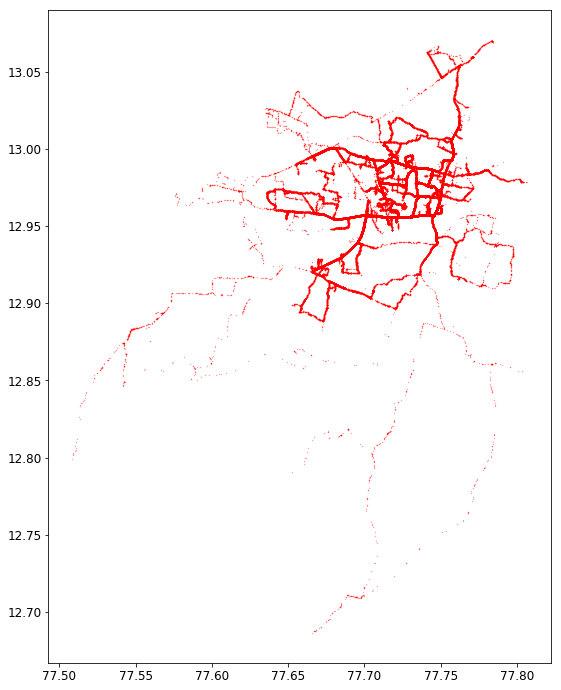

In [10]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(train_data.longitude, train_data.latitude, s=0.1, alpha=0.5, c='r')
plt.show()

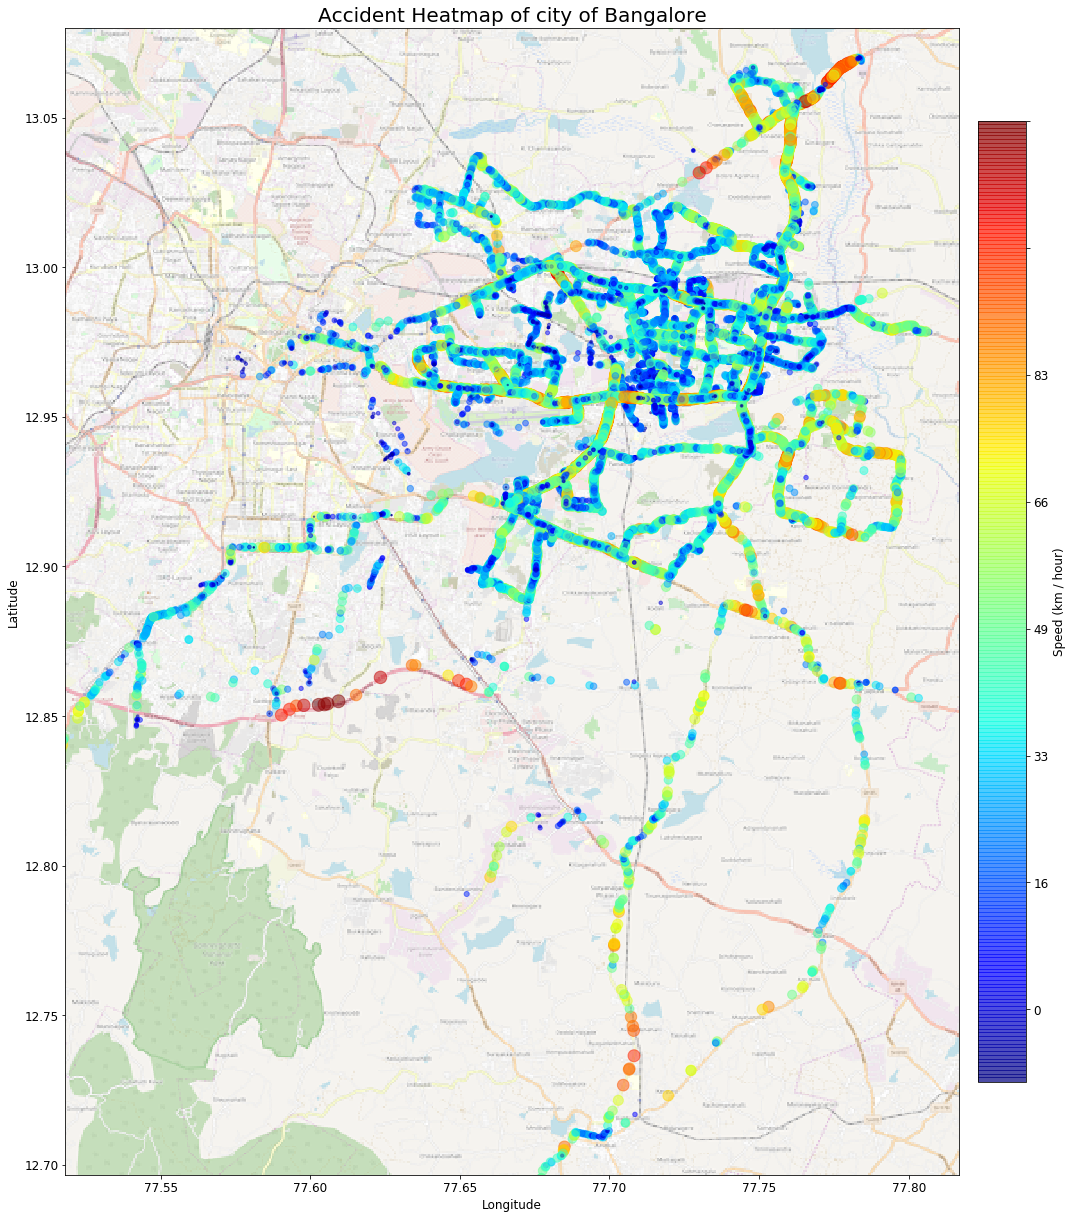

In [11]:
# Scatter plot with map
#bangalore_map_img = "bangalore_map.png"
#bangalore_map = plt.imread(os.path.join(input_data_dir, bangalore_map_img))

bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("jet")

axes = train_data.plot(figsize=(15,20), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", s=train_data["speed"]*2,
                    c=train_data["speed"], cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Accident Heatmap of city of Bangalore')

# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)

plt.show()

NameError: name 'bbmp_data' is not defined

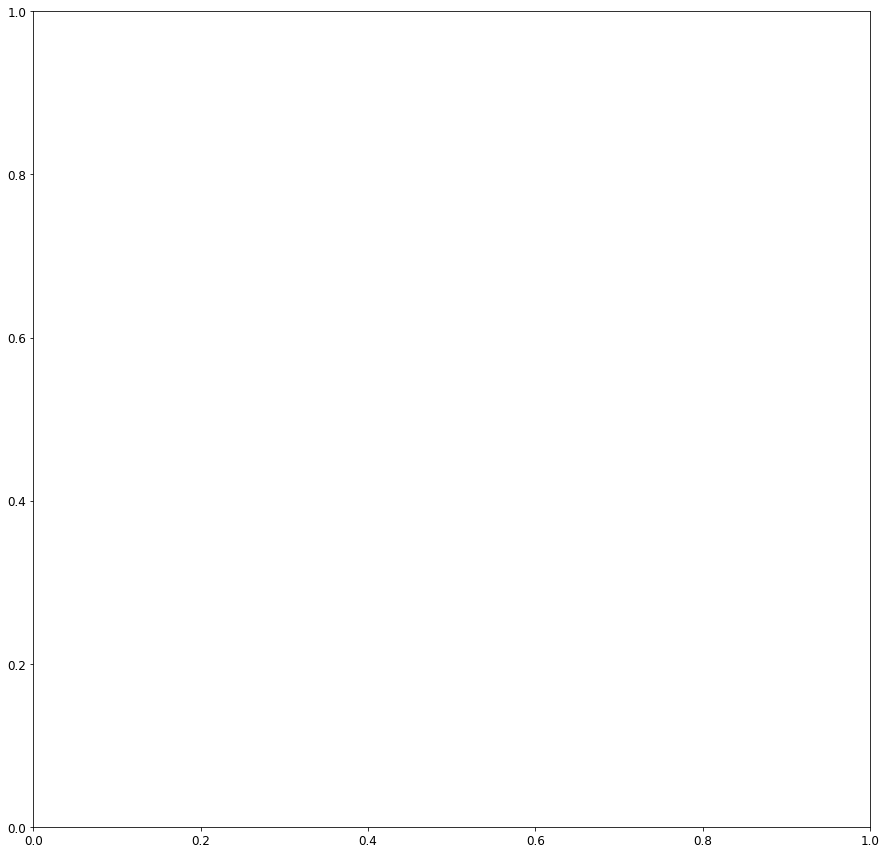

In [12]:
fig, axes = plt.subplots(figsize=(15,15))
cmap = plt.get_cmap("jet")

data = bbmp_data[bbmp_data.WARD_NAME.isin(ward_top)]

axes.scatter(data.LON, data.LAT, marker="v", s=300,
                   c='red', zorder=1)
axes.set_title("Most dangerous wards for traffic")

# Plot Bangalore map image
epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]

axes.imshow(bangalore_map, extent=bound_box, alpha=0.7, zorder=0)

# Add names of wards as text
for _idx, _ward_data in data.iterrows():
    axes.text(_ward_data.LON  - epsilon/2, _ward_data.LAT + epsilon/2, 
              _ward_data.WARD_NAME, color='blue', fontsize=11)

axes.set_yticklabels([])
axes.set_xticklabels([])

plt.tight_layout()
plt.show()